# Ejercicio 2 Grupal

### Autores: Mario Fernandez, Alex Dominguez, Haroon Rehman

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn import set_config
from apafib import load_stroke 
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

set_config(display='text')
warnings.filterwarnings('ignore')

sns.set()
pd.set_option('display.precision', 3)

In [4]:
header = ["age", "gender", "TB", "DB", "Alkp", "Sgpt", "Sgot", "TP", "ALB", "A/G", "class"]
data = pd.read_csv("./Indian Liver Patient Dataset (ILPD).csv", names=header, delimiter=',')
data.describe().T
data.head()
data.isna().sum()

# Variables
variables = data[data.columns[:-1]]
# Variable objetivo
variableObj = data['class']

,count,mean,std,min,25%,50%,75%,max
age,583.0,44.746,16.190,4.0,33.0,45.00,58.0,90.0
TB,583.0,3.299,6.210,0.4,0.8,1.00,2.6,75.0
DB,583.0,1.486,2.808,0.1,0.2,0.30,1.3,19.7
Alkp,583.0,290.576,242.938,63.0,175.5,208.00,298.0,2110.0
Sgpt,583.0,80.714,182.620,10.0,23.0,35.00,60.5,2000.0
Sgot,583.0,109.911,288.919,10.0,25.0,42.00,87.0,4929.0
TP,583.0,6.483,1.085,2.7,5.8,6.60,7.2,9.6
ALB,583.0,3.142,0.796,0.9,2.6,3.10,3.8,5.5
A/G,579.0,0.947,0.320,0.3,0.7,0.93,1.1,2.8
class,583.0,1.286,0.452,1.0,1.0,1.00,2.0,2.0


,age,gender,TB,DB,Alkp,Sgpt,Sgot,TP,ALB,A/G,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


age       0
gender    0
TB        0
DB        0
Alkp      0
Sgpt      0
Sgot      0
TP        0
ALB       0
A/G       4
class     0
dtype: int64

In [5]:
variables['A/G'].fillna(variables['A/G'].mean(), inplace=True)
variables.isna().sum()

age       0
gender    0
TB        0
DB        0
Alkp      0
Sgpt      0
Sgot      0
TP        0
ALB       0
A/G       0
dtype: int64

In [6]:
print(variables['gender'].value_counts())
# Obtener variables dummy para la columna 'gender'
variables = pd.get_dummies(variables, columns=['gender'])
variables.head()

gender
Male      441
Female    142
Name: count, dtype: int64


,age,TB,DB,Alkp,Sgpt,Sgot,TP,ALB,A/G,gender_Female,gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,True,False
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,False,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,False,True
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,False,True
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,False,True


In [7]:
# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(variables, variableObj,  test_size=0.3, random_state=0, stratify=variableObj)
y_train = y_train - 1
y_test = y_test - 1 

# y_test.head()

El metodo que emplearemos para reducir la dimensionalidad del problera sera el uso del PCA.

In [8]:
# Estandarizar variables
scaler = StandardScaler()
X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)


#y_train = y_train - 1
#y_test = y_test -1
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(408, 11)
(175, 11)
(408,)
(175,)


Text(0.5, 1.0, 'Reducción de dimensionalidad con PCA')

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

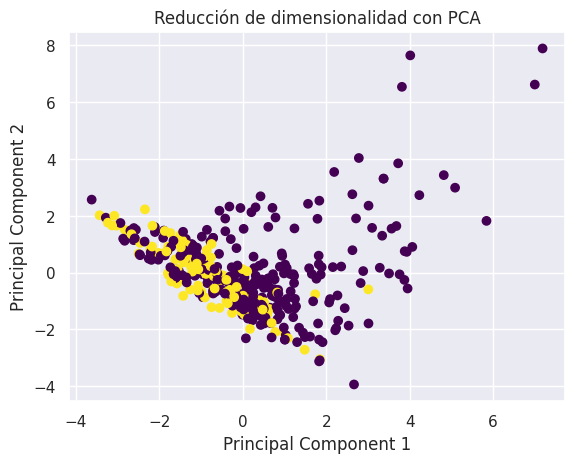

In [9]:
# Reducción de dimensionalidad con PCA
pca = PCA().fit(X_train_std)
X_train_pca = pca.transform(X_train_std)

# Visualización de la reducción de dimensionalidad
plt.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

En el análisis del PCA, se identifican dos clases, siendo una de ellas (personas sanas) notablemente superpuesta con el otro conjunto. Esta superposición puede plantear desafíos al intentar prever el estado futuro de una persona.

In [10]:
nb_model = GaussianNB()
# Calcular el acierto de validación cruzada
cross_val_acc = cross_val_score(nb_model, x_train, y_train, cv=10, scoring='accuracy').mean()
print(f"Acierto de Validación Cruzada: {cross_val_acc:.2f}")


Acierto de Validación Cruzada: 0.57


La tasa de acierto es ligeramente superior al 50%, probablemente debido a la clase sano como habiamos vizualizado en el PCA, una manera de solventar este problema podria ser el uso de tecnicas de separación entre clases para obtener resultados benficiosos.

In [11]:
# Ajustar modelo y hacer predicciones
nb_model.fit(X_train_std, y_train)
y_pred = nb_model.predict(X_test_std)

GaussianNB()

In [12]:
# Informe de clasificación y matriz de confusión
print("\nInforme de Clasificación:")
print(classification_report(y_pred, y_test,target_names=['Enfermo', 'Sano']))


Informe de Clasificación:
              precision    recall  f1-score   support

     Enfermo       0.43      0.95      0.59        57
        Sano       0.94      0.40      0.56       118

    accuracy                           0.58       175
   macro avg       0.69      0.67      0.58       175
weighted avg       0.77      0.58      0.57       175



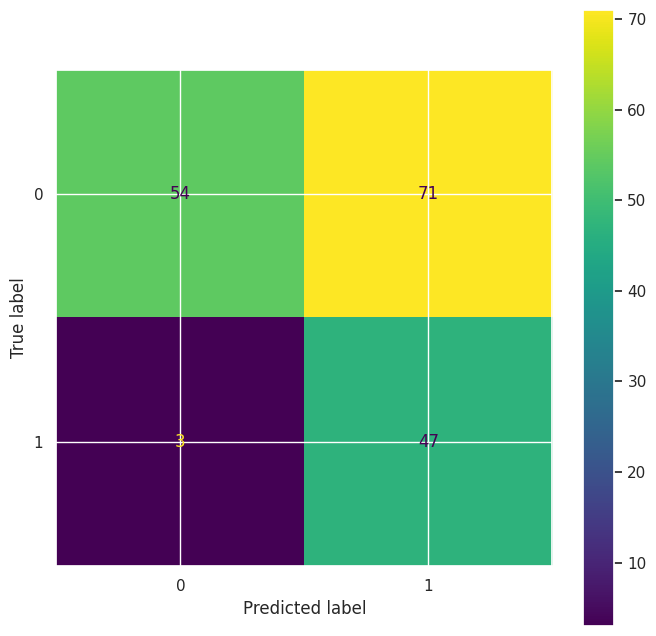

In [13]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(nb_model, X_test_std,y_test,ax=plt.subplot());

El informe de clasificación y la matriz de confusión proporcionan una visión detallada del rendimiento del modelo, destacando la presencia de falsos positivos en la categoría 'sanos'. Debemos mejorar la precisión y la fiabilidad de las predicciones, especialmente en lo que respecta a la identificación precisa de individuos sanos.

<Figure size 800x800 with 0 Axes>

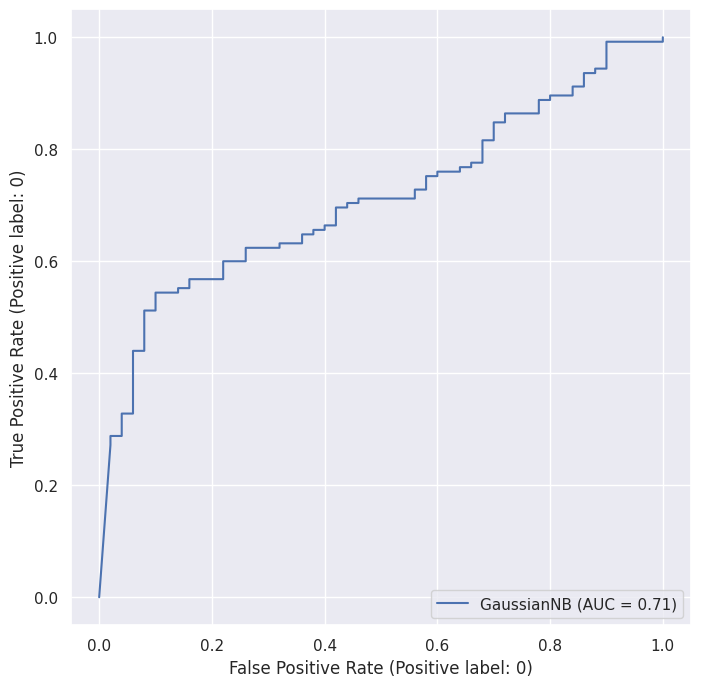

In [14]:
plt.figure(figsize=(8,8))
RocCurveDisplay.from_estimator(nb_model, X_test_std, y_test, pos_label=0, ax=plt.subplot())

<Figure size 800x800 with 0 Axes>

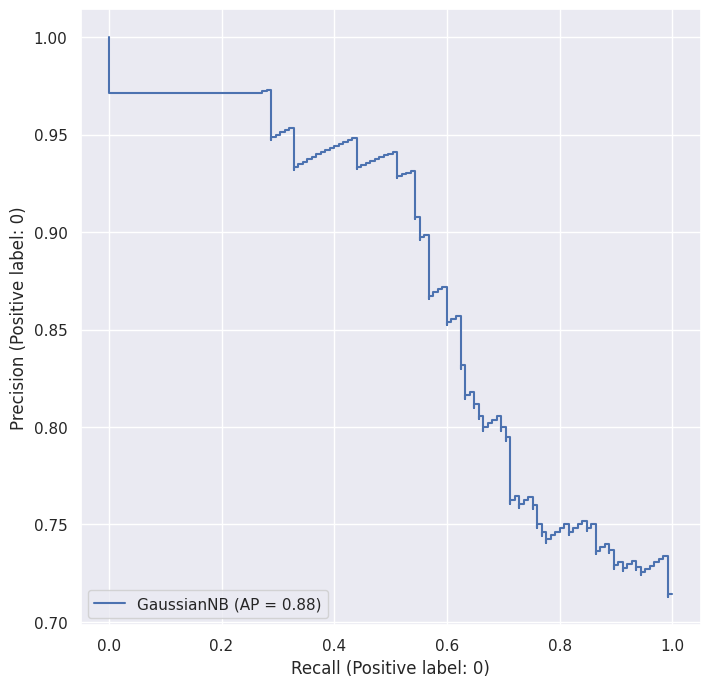

In [15]:
plt.figure(figsize=(8,8))
PrecisionRecallDisplay.from_estimator(nb_model, X_test_std,y_test, pos_label=0, ax=plt.subplot())

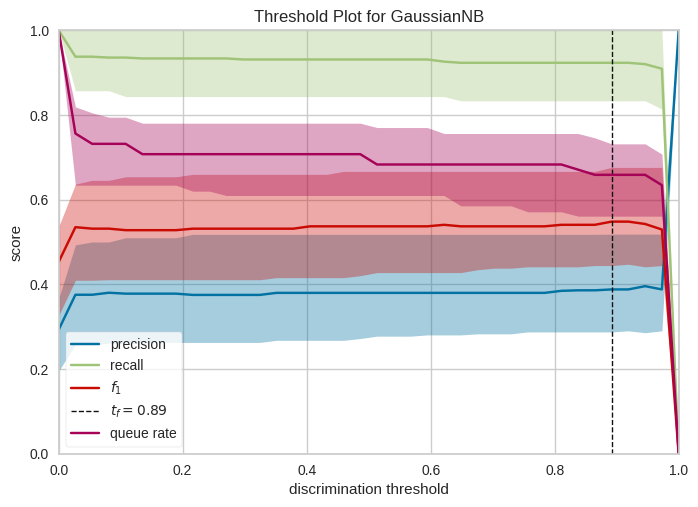

In [16]:
from yellowbrick.classifier.threshold import discrimination_threshold

discrimination_threshold(nb_model, X_train_std, y_train, is_fitted=True);

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

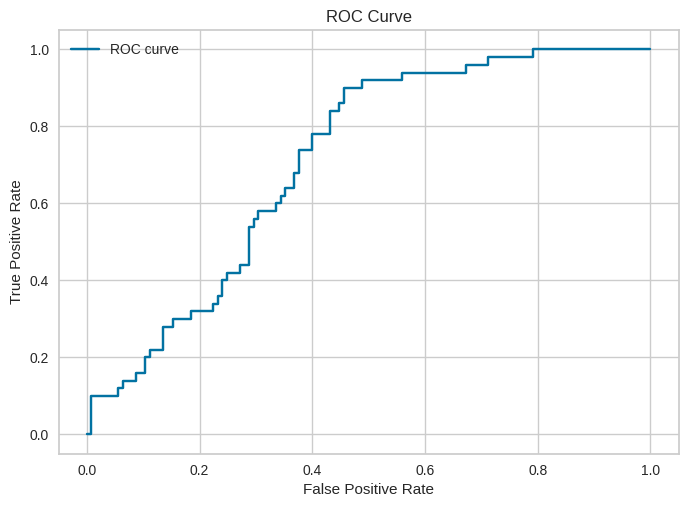

In [17]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test_std)[:, 1])
# Representar la curva ROC
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

La descripción de tu curva ROC sugiere un rendimiento inicial aleatorio. A medida que avanza, indica un aumento en la capacidad de discriminación del modelo, alcanzando una sensibilidad considerable con pocos falsos positivos. Luego, la curva se estabiliza, indicando un alto nivel de sensibilidad pero con una tasa creciente de falsos positivos.

En la recta final el modelo esta clasificando todas las instancias como positivas, lo que resulta en un aumento de falsos positivo. Una manera de evitar esto seria encontrar un umbral de dicisón que afecte en la especificación del modelo.

In [18]:
# Encontrar el umbral razonable
umbral_roc = thresholds[np.argmax(tpr - fpr)]
print(f"Umbral seleccionado: {umbral_roc:.2f}")

# Aplicar el umbral a las predicciones
y_pred_umbral = (nb_model.predict_proba(X_test_std)[:, 1] > umbral_roc).astype(int)

# Calcular métricas con el nuevo umbral
acc_umbral = accuracy_score(y_test, y_pred_umbral)
precision_umbral = precision_score(y_test, y_pred_umbral)
recall_umbral = recall_score(y_test, y_pred_umbral)

print(f"Acierto con umbral: {acc_umbral:.2f}")
print(f"Precisión con umbral: {precision_umbral:.2f}")
print(f"Recuperación con umbral: {recall_umbral:.2f}")


Umbral seleccionado: 0.98
Acierto con umbral: 0.64
Precisión con umbral: 0.44
Recuperación con umbral: 0.88


In [19]:
#Aqui esta la diferencia a la hora de cambiar las categorias entre binario o no

In [20]:
# Modelo Naive Bayes (Gaussiano)
nb_model = GaussianNB()
cross_val_acc = cross_val_score(nb_model, X_train_std, y_train, cv=5, scoring='accuracy').mean()
print(f"Acierto de Validación Cruzada: {cross_val_acc:.2f}")

Acierto de Validación Cruzada: 0.57


In [21]:
# Ajustar modelo y hacer predicciones
nb_model.fit(X_train_std, y_train)
y_pred = nb_model.predict(X_test_std)

# Informe de clasificación y matriz de confusión
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

GaussianNB()


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.43      0.59       125
           1       0.40      0.94      0.56        50

    accuracy                           0.58       175
   macro avg       0.67      0.69      0.58       175
weighted avg       0.79      0.58      0.58       175



Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

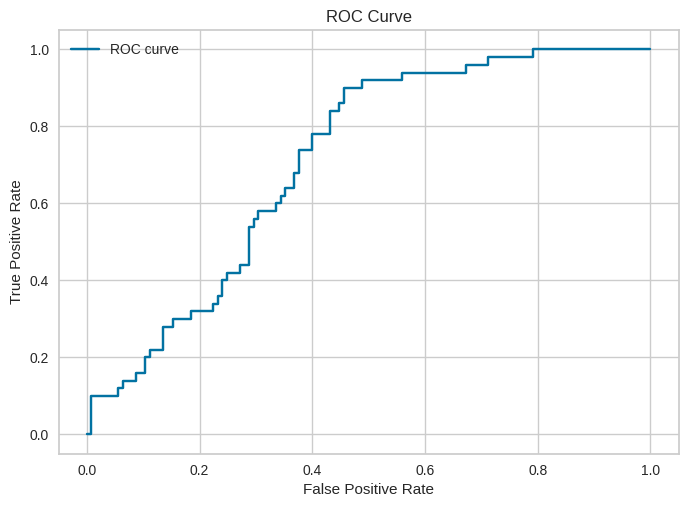

In [22]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test_std)[:, 1])
# Representar la curva ROC
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [23]:
# Encontrar el umbral razonable
umbral_roc = thresholds[np.argmax(tpr - fpr)]
print(f"Umbral seleccionado: {umbral_roc:.2f}")

# Aplicar el umbral a las predicciones
y_pred_umbral = (nb_model.predict_proba(X_test_std)[:, 1] > umbral_roc).astype(int)

# Calcular métricas con el nuevo umbral
acc_umbral = accuracy_score(y_test, y_pred_umbral)
precision_umbral = precision_score(y_test, y_pred_umbral)
recall_umbral = recall_score(y_test, y_pred_umbral)

print(f"Acierto con umbral: {acc_umbral:.2f}")
print(f"Precisión con umbral: {precision_umbral:.2f}")
print(f"Recuperación con umbral: {recall_umbral:.2f}")


Umbral seleccionado: 0.98
Acierto con umbral: 0.64
Precisión con umbral: 0.44
Recuperación con umbral: 0.88


In [24]:
# d) Modelo Discriminante Lineal (LDA)

# Ajustar un modelo LDA a los datos de entrenamiento
lda_model = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
lda_model.fit(X_train_std, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lda = lda_model.predict(X_test_std)

# Calcular métricas del modelo LDA
acc_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)

print(f"Acierto del modelo LDA: {acc_lda:.2f}")
print(f"Precisión del modelo LDA: {precision_lda:.2f}")
print(f"Recuperación del modelo LDA: {recall_lda:.2f}")

# Encontrar un umbral razonable para LDA
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, lda_model.predict_proba(X_test_std)[:, 1])
umbral_lda = thresholds_lda[np.argmax(tpr_lda - fpr_lda)]
print(f"Umbral seleccionado para LDA: {umbral_lda:.2f}")

# Aplicar el umbral a las predicciones de LDA
y_pred_lda_umbral = (lda_model.predict_proba(X_test_std)[:, 1] > umbral_lda).astype(int)

# Calcular métricas con el nuevo umbral para LDA
acc_lda_umbral = accuracy_score(y_test, y_pred_lda_umbral)
precision_lda_umbral = precision_score(y_test, y_pred_lda_umbral)
recall_lda_umbral = recall_score(y_test, y_pred_lda_umbral)

print(f"Acierto con umbral para LDA: {acc_lda_umbral:.2f}")
print(f"Precisión con umbral para LDA: {precision_lda_umbral:.2f}")
print(f"Recuperación con umbral para LDA: {recall_lda_umbral:.2f}")

LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')

Acierto del modelo LDA: 0.70
Precisión del modelo LDA: 0.43
Recuperación del modelo LDA: 0.12
Umbral seleccionado para LDA: 0.24
Acierto con umbral para LDA: 0.58
Precisión con umbral para LDA: 0.39
Recuperación con umbral para LDA: 0.90


Coefs:
            0
age    -0.260
gender -0.410
TB     -0.491
DB     -0.390
Alkp   -0.320
Sgpt   -0.401
Sgot    0.035
TP      0.395
ALB     0.397
A/G     0.162
class  -0.162


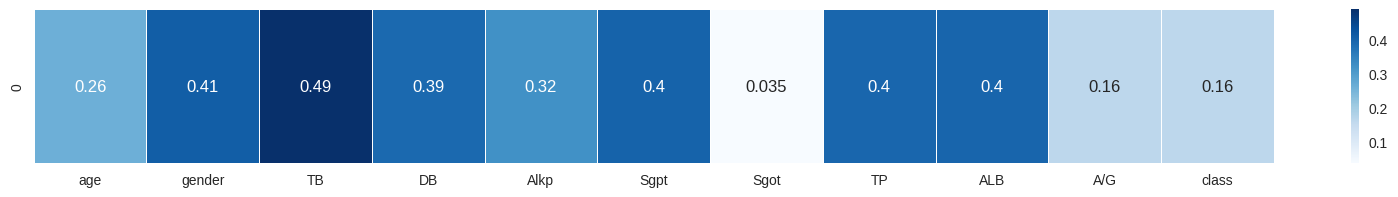

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'shrinkage': ['auto', None, 0.1, 0.5, 0.9]}
grid_search = GridSearchCV(lda_model, param_grid, cv=5)
grid_search.fit(X_train_std, y_train)

best_lda_model = grid_search.best_estimator_

lda_model = best_lda_model.fit(X_train_std, y_train)

print('Coefs:')
coefs = pd.DataFrame(lda_model.coef_)
coefs.columns = header
print(coefs.T)

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12});


In [26]:
print(classification_report(lda_model.predict(X_test_std), y_test))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       127
           1       0.38      0.40      0.39        48

    accuracy                           0.66       175
   macro avg       0.57      0.58      0.57       175
weighted avg       0.66      0.66      0.66       175



<Figure size 800x800 with 0 Axes>

class
0    125
1     50
Name: count, dtype: int64

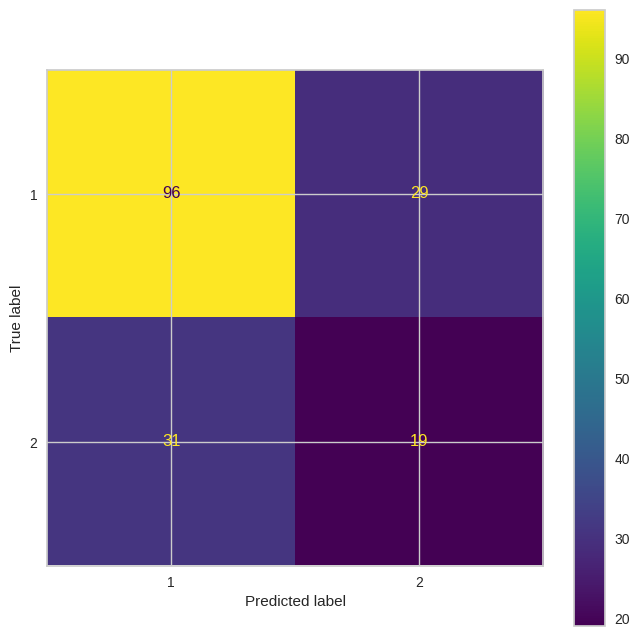

In [27]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lda_model, X_test_std,y_test, display_labels=['1', '2'], ax=plt.subplot());
y_test.value_counts()

    Acierto del modelo LDA: 0.70: Un acierto del 70% podría indicar que el modelo LDA está bien ajustado a los datos de entrenamiento. Es probable que el modelo esté generalizando correctamente a nuevos datos.

    Precisión del modelo LDA: 0.43, Recuperación del modelo LDA: 0.12: Una precisión del 43% y una recuperación del 12% sugieren que el modelo está clasificando algunas instancias positivas correctamente, pero también está cometiendo falsos positivos y falsos negativos.

    Umbral seleccionado para LDA: 0.24: El umbral de 0.24 indica que el modelo está tomando decisiones con cierta seguridad, pero no de manera extrema. Esto podría deberse a que el modelo LDA tiene una probabilidad moderada de predicciones positivas, y el umbral se ajusta para equilibrar el trade-off entre falsos positivos y falsos negativos.

    Acierto con umbral para LDA: 0.58, Precisión con umbral para LDA: 0.39, Recuperación con umbral para LDA: 0.90: Estos resultados podrían indicar que, al aplicar un umbral más alto (posiblemente 0.24), el modelo está clasificando la mayoría de las instancias como negativas, mejorando la precisión pero disminuyendo la recuperación.

Los resultados sugieren que el modelo LDA podría mejorar si se le aplican unos ajustes adicionales.

## Apartado e: Regresión Logística

A continuación, ajustaremos un model de regresión logísitica y compararemos sus resultados con Naive Bayes. 

In [28]:
lr_model = LogisticRegression(max_iter=10000)
param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr_model,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train_std, y_train)
show_html(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.99526231e-03, 3.98107171e-03, 7.94328235e-03,
       1.58489319e-02, 3.16227766e-02, 6.30957344e-02, 1.25892541e-01,
       2.51188643e-01, 5.01187234e-01, 1.00000000e+00, 1.99526231e+00,
       3.98107171e+00, 7.94328235e+00, 1.58489319e+01, 3.16227766e+01,
       6.30957344e+01, 1.25892541e+02, 2.51188643e+02, 5.01187234e+02,
       1.00000000e+03]),
                         'penalty': ['l1', 'l2']})

,params,mean_test_score,rank_test_score
7,"{'C': 0.007943282347242814, 'penalty': 'l2'}",0.716,1
1,"{'C': 0.001, 'penalty': 'l2'}",0.713,2
3,"{'C': 0.001995262314968879, 'penalty': 'l2'}",0.713,2
5,"{'C': 0.003981071705534973, 'penalty': 'l2'}",0.713,2
9,"{'C': 0.015848931924611134, 'penalty': 'l2'}",0.713,2


Vemos como los mejores parametros son C = 0.0079, penalty = l2.

Coefs:


<Figure size 2000x200 with 0 Axes>

<Axes: >

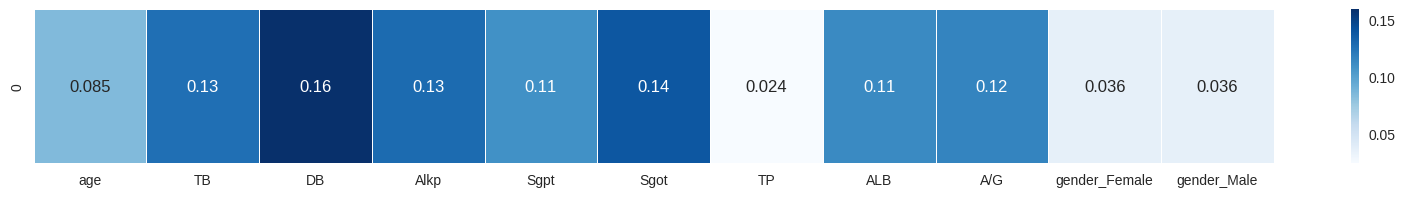

In [29]:
print('Coefs:')
coefs = pd.DataFrame(lr_gs.best_estimator_.coef_)
coefs.columns = x_train.columns

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12})

              precision    recall  f1-score   support

     Enfermo       0.99      0.72      0.83       173
        Sano       0.02      0.50      0.04         2

    accuracy                           0.71       175
   macro avg       0.51      0.61      0.44       175
weighted avg       0.98      0.71      0.82       175



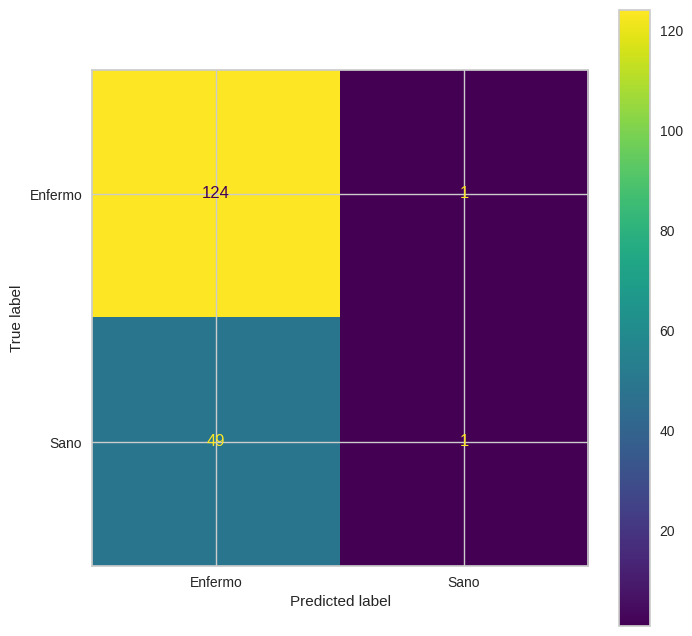

In [30]:
print(classification_report(lr_gs.predict(X_test_std), y_test, target_names=['Enfermo', 'Sano']))
#results_df = save_results(lr_gs, train_varsNorm, y_train, test_varsNorm, y_test, 'Logistic UnBalanced', results_df)

plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(lr_gs, X_test_std,y_test, display_labels=['Enfermo', 'Sano'], ax=plt.subplot());

Vemos como el modelo clasifica la gran mayoría como enfermos y por eso tiene una altisima precision para enfermos. Sin embargo, es pesimo a la hora de clasificar los sanos. El f1-score no es del todo malo porque es una combinación de los 2, aunque realmente no es buen modelo por el motivo explicado anteriormente.

<Figure size 800x800 with 0 Axes>

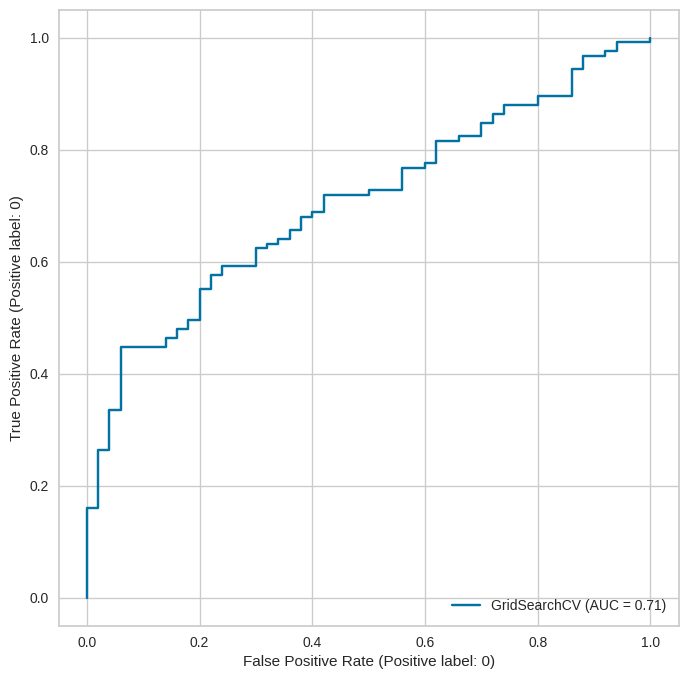

In [31]:
plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(lr_gs, X_test_std,y_test, pos_label=0, ax=plt.subplot())

Tampoco vemos que haya un lindar que sea superior al resto.

In [32]:
y_prob = lr_gs.predict_proba(X_test_std)[:, 1]

thresholds = np.arange(0, 1.1, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred_thresholded = (y_prob > threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresholded))
best_threshold = thresholds[np.argmax(f1_scores)]

y_pred_best_threshold = (y_prob > best_threshold).astype(int)

print(f"Encert con lindar {best_threshold}: {accuracy_score(y_test, y_pred_best_threshold)}")
print(f"F1-score con lindar {best_threshold}: {f1_score(y_test, y_pred_best_threshold)}")
print(f"Precisió con lindar {best_threshold}: {precision_score(y_test, y_pred_best_threshold)}")
print(f"Recuperació con lindar {best_threshold}: {recall_score(y_test, y_pred_best_threshold)}")

print("F1-score:", f1_score(y_test, lr_gs.predict(X_test_std), average='weighted'))

Encert con lindar 0.26: 0.56
F1-score con lindar 0.26: 0.5497076023391813
Precisió con lindar 0.26: 0.3884297520661157
Recuperació con lindar 0.26: 0.94
F1-score: 0.6054281289180617


Con el lindar aplicado el resultado de f1-score sigue siendo hasta peor que el que teniamos antes. 

Si lo comparamos con Naive Bayes, en este modelo se obtienen mejores resultados para f1-score pero por lo mencionado anteriormente. No tiene sentido escoger este por encima de el otro, ya que este puede ser muy bueno prediciendo enfermos pero es pesimo para enfermos. Si por el contrario no nos importara que fallara al predecir sanos, este sería un mejor modelo.

## Apartado F: K-vecinos

In [33]:
params = {'n_neighbors':[1, 3, 7, 15, 25, 45], 
          'weights':['uniform', 'distance'], 
          'leaf_size':[1, 5, 10, 15, 20, 30],
          'metric': ['l1', 'l2', 'cosine']}
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_vec = scaler.fit_transform(X_train_std)
x_test_vec = scaler.transform(X_test_std)
from sklearn.neighbors import KNeighborsClassifier
cv = 10
knn = KNeighborsClassifier()

knngs =  GridSearchCV(knn,params,cv=cv, n_jobs=-1);
knngs.fit(x_train_vec, y_train)
show_html(pd.DataFrame(knngs.cv_results_).loc[:, ['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head().to_html())


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 5, 10, 15, 20, 30],
                         'metric': ['l1', 'l2', 'cosine'],
                         'n_neighbors': [1, 3, 7, 15, 25, 45],
                         'weights': ['uniform', 'distance']})

,params,mean_test_score,rank_test_score
210,"{'leaf_size': 30, 'metric': 'cosine', 'n_neighbors': 15, 'weights': 'uniform'}",0.726,1
102,"{'leaf_size': 10, 'metric': 'cosine', 'n_neighbors': 15, 'weights': 'uniform'}",0.726,1
30,"{'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 15, 'weights': 'uniform'}",0.726,1
138,"{'leaf_size': 15, 'metric': 'cosine', 'n_neighbors': 15, 'weights': 'uniform'}",0.726,1
174,"{'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 15, 'weights': 'uniform'}",0.726,1


Hay varias buenas combinaciones de parametros cualquiera de las de la tabla nos serviría.

In [34]:
print(classification_report(knngs.predict(x_test_vec), y_test,target_names=['Malalt', 'Sa']))
#results_df = save_results(knngs, x_train_vec, y_train, x_test_vec, y_test, 'KNN', results_df)
print("F1-score: ", f1_score(y_test, knngs.predict(x_test), average='weighted'))

              precision    recall  f1-score   support

      Malalt       0.83      0.71      0.77       146
          Sa       0.16      0.28      0.20        29

    accuracy                           0.64       175
   macro avg       0.50      0.49      0.49       175
weighted avg       0.72      0.64      0.67       175

F1-score:  0.5952380952380952


Para este modelo obtenemos mejores resultados para sanos en precision, recall y f1-score, pero peores para enfermos y, en general, peores resultados que antes.

<Figure size 800x800 with 0 Axes>

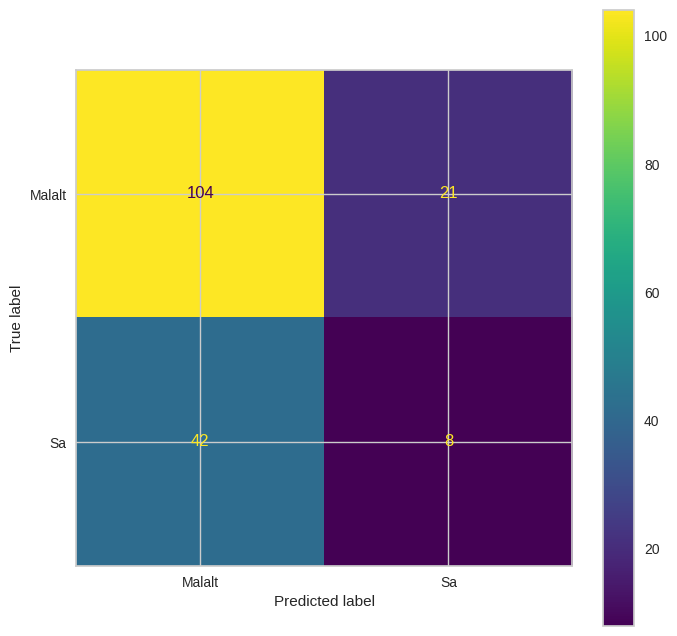

In [35]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(knngs, x_test_vec,y_test, display_labels=['Malalt', 'Sa'], ax=plt.subplot())

Como se ha mencionado anteriormente, obtenemos mejores resultados para sano que antes, pero peores para enfermos.

<Figure size 800x800 with 0 Axes>

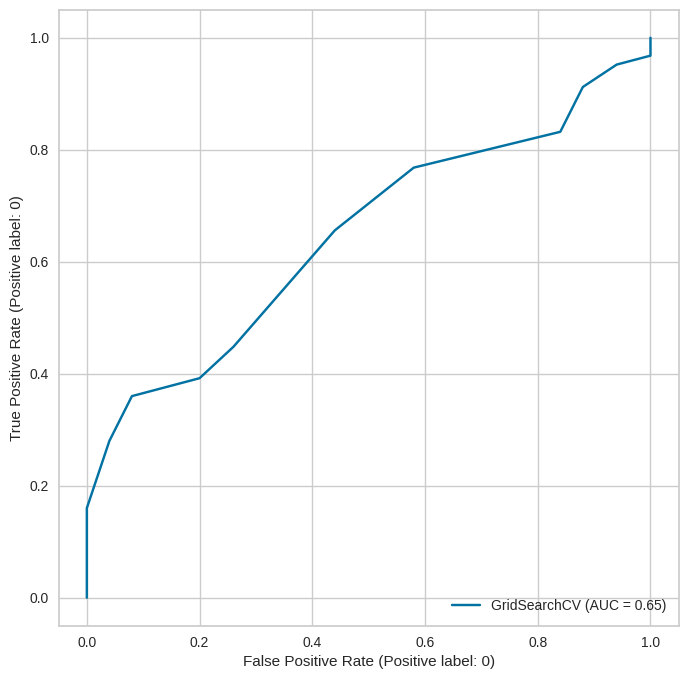

In [36]:
plt.figure(figsize=(8,8))
RocCurveDisplay.from_estimator(knngs, x_test_vec,y_test, pos_label=0, ax=plt.subplot())

In [37]:
y_prob = knngs.predict_proba(x_test)[:, 1]

thresholds = np.arange(0, 1.1, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred_thresholded = (y_prob > threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresholded))


best_threshold = thresholds[np.argmax(f1_scores)]

y_pred_best_threshold = (y_prob > best_threshold).astype(int)

print(f"Encert con lindar {best_threshold}: {accuracy_score(y_test, y_pred_best_threshold)}")
print(f"F1-score con lindar {best_threshold}: {f1_score(y_test, y_pred_best_threshold)}")
print(f"Precisió con lindar {best_threshold}: {precision_score(y_test, y_pred_best_threshold)}")
print(f"Recuperació con lindar {best_threshold}: {recall_score(y_test, y_pred_best_threshold)}")

Encert con lindar 0.0: 0.3485714285714286
F1-score con lindar 0.0: 0.4672897196261682
Precisió con lindar 0.0: 0.3048780487804878
Recuperació con lindar 0.0: 1.0


Vemos como no hay ningun lindar que mejore los valores obtenidos.

En general, este modelo no tiene buen rendimiento y es peor que el anterior en terminos de recall, precision y f1-score.

Escoger uno de los modelos no es fácil, ya que no hay uno que destaque por encima de los demás. Todos tienen puntos fuertes y carencias. 
Si prefiriermos uno el cual predijera con mucha precisión los enfermos para evitar contagios si se tratara de una enfermerdad muy contagiosa (por ejemplo), escogeríamos el de regresión logísitica. Si fuera al contrario, el mejor sería Naive Bayes. Por último, si buscaramos uno que fuera un poco la combinación de los 2, pese a que regresión logísitca obtiene mejores resultados de f1-score por lo mencionado anteriormente, el mejor sería usando k-vecinos, ya que está más balanceado en aciertos en enfermos y sanos. 